<a href="https://colab.research.google.com/github/StevenGarc/Ejercicios_IA/blob/master/sa_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as rn


In [ ]:
e = np.arange(0, 2000, 0.1)

In [ ]:
# Parámetros: Energía temperatura. Probabilidad de tener un estado con energía e
def p(e, t): 
  return np.exp(-e/t)

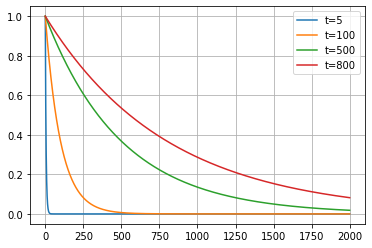

In [ ]:
# realizar varias gráficas (t=5, t=100, t=800, t=500)
#responder: cuando es más probable que un estado tenga una energía alta_
p1=plt.plot(e, p(e,t=5))
p2=plt.plot(e, p(e,t=100))
p3=plt.plot(e, p(e,t=500))
p4=plt.plot(e, p(e,t=800))
plt.grid(True)
plt.legend(('t=5','t=100','t=500','t=800'))
plt.show()

# Parte 2


minimizar f(x1, x2) = (x1^2 +x2 -11)^2 +(x2^2 +x1 -7)^2, sujeto  x1 >=0 , x2<=5 , con estado inicial (2.5, 2.5) , utilizando simulated annealing



In [ ]:
class Estado:
  x1 = 0
  x2 = 0
  def __init__(self, x1, x2):
    self.x1 = x1
    self.x2 = x2
  def __str__(self):
    return "({}, {})".format(self.x1, self.x2)
  def __repr__(self):
    return self.__str__()

In [ ]:
def fcost(estado):
  x1 = estado.x1
  x2 = estado.x2
  f = float('inf')
  if x1 >=0 and x2<=5: 
    f = (x1**2 +x2-11)**2 +(x2**2 +x1 -7)**2 
  return f

In [ ]:
#se mueve solo en x1 (2)  -> (2.6, 2.5) (2.4, 2.5)
#se mueve solo en x2 (2) ->
#se mueve en x1 y en x2 (4) (2.6, 2.6) (2.4, 2.4) ...
#(2.5, 2.5)

def generar_nuevo_x1(x1_actual):
    nuevo_x1 = -1000
    if rn.random() < 0.5: return x1_actual

    while nuevo_x1 < 0:
      delta = 0.1
      if rn.random() > 0.5:
        delta = -delta
      nuevo_x1 = x1_actual + delta
    return nuevo_x1

def generar_nuevo_x2(x2_actual):
    nuevo_x2 = -1000
    if rn.random() < 0.5: return x2_actual

    while nuevo_x2 < 0:
      delta = 0.1
      if rn.random() > 0.5:
        delta = -delta
      nuevo_x2 = x2_actual + delta
    return nuevo_x2

In [ ]:
def generar_estado_siguiente(actual):
  nuevo = Estado(generar_nuevo_x1(actual.x1), generar_nuevo_x2(actual.x2))
  return nuevo

In [ ]:
def disminuir_temperatura(temp_actual, factor):
        return factor * temp_actual

In [ ]:
def simulated_anneling(temp_inicial, estado_inicial, factor):
  T = temp_inicial
  actual = estado_inicial
  while T > 0.01:
    nuevo = generar_estado_siguiente(actual)
    delta_e = fcost(nuevo) - fcost(actual)
    if delta_e < 0: # en este caso < 0 porque se está minimizando la función
      actual = nuevo
    elif rn.random() < p(delta_e, T):
      actual = nuevo
    T = disminuir_temperatura(T, factor)

  return actual

In [ ]:
r = simulated_anneling(800, Estado(2.5,2.5), 0.9)
print(r)
fcost(r)

(3.0000000000000004, 1.9999999999999996)


1.5777218104420236e-29